In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


true_records_df = pd.read_csv('true_records.csv')
false_records_df = pd.read_csv('false_records.csv')


true_records_df['Diagnosed'] = 1
false_records_df['Diagnosed'] = 0


concatenated_df = pd.concat([true_records_df, false_records_df], ignore_index=True)

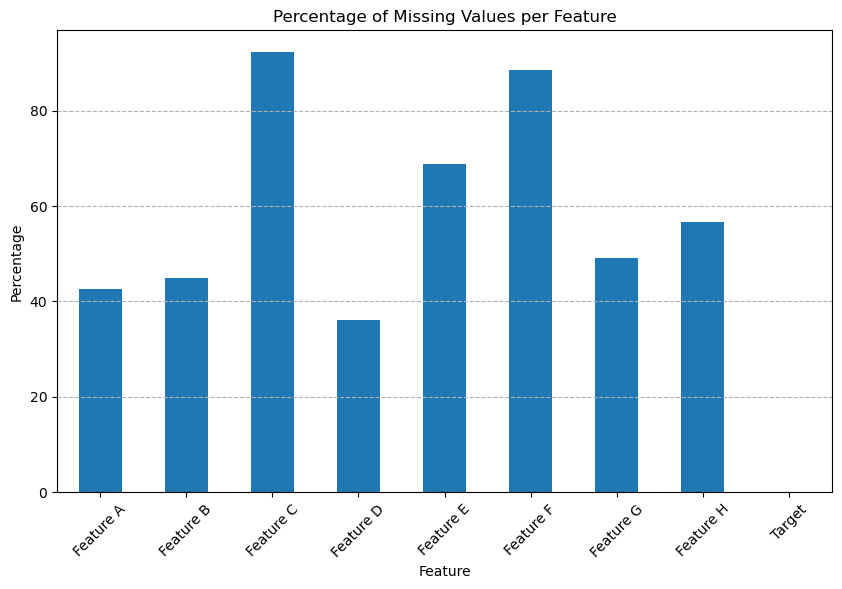

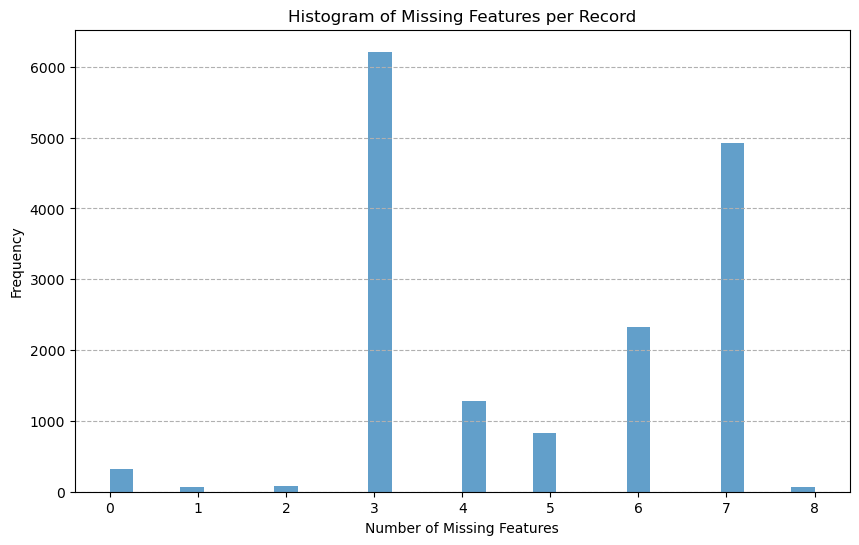

In [2]:

missing_percentage = concatenated_df.isnull().mean() * 100


plt.figure(figsize=(10, 6))
missing_percentage.drop('Diagnosed').plot(kind='bar')
plt.title('Percentage of Missing Values per Feature')
plt.ylabel('Percentage')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


missing_features_count = concatenated_df.isnull().sum(axis=1)
plt.figure(figsize=(10, 6))
missing_features_count.plot(kind='hist', bins=30, alpha=0.7)
plt.title('Histogram of Missing Features per Record')
plt.xlabel('Number of Missing Features')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

In [3]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: blog 1.0.1 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of blog or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: blog 1.0.1 has a non-standard dependency specifier Jinja2>=2.10.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of blog or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: blog 1.0.1 has a non-standard dependency specifier Markdown>=3.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of blog or contact the author to suggest that they release a version with a conforming dependency spe

In [4]:

filled_df = concatenated_df.fillna(concatenated_df.mean())


X = concatenated_df.drop('Diagnosed', axis=1)
y = concatenated_df['Diagnosed']
X_train_unfilled, X_test_unfilled, y_train_unfilled, y_test_unfilled = train_test_split(
    X, y, test_size=0.2, random_state=42)


X_filled = filled_df.drop('Diagnosed', axis=1)
y_filled = filled_df['Diagnosed']
X_train_filled, X_test_filled, y_train_filled, y_test_filled = train_test_split(
    X_filled, y_filled, test_size=0.2, random_state=1111)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import time


logistic_regression = LogisticRegression(max_iter=1000)
svc = SVC(probability=True)
random_forest = RandomForestClassifier()


fit_times = {}

# Train Logistic Regression
start_time = time.time()
logistic_regression.fit(X_train_filled, y_train_filled) 
fit_times['Logistic Regression'] = time.time() - start_time

# Train Support Vector Classifier
start_time = time.time()
svc.fit(X_train_filled, y_train_filled)  
fit_times['Support Vector Classifier'] = time.time() - start_time

# Train Random Forest Classifier
start_time = time.time()
random_forest.fit(X_train_filled, y_train_filled)  
fit_times['Random Forest Classifier'] = time.time() - start_time

# Output the training times
print(fit_times)

{'Logistic Regression': 0.3242988586425781, 'Support Vector Classifier': 39.743990421295166, 'Random Forest Classifier': 0.4114203453063965}


In [8]:

# LightGBM with filled data
import lightgbm as lgb
lgbm_filled = lgb.LGBMClassifier()
start_time = time.time()
lgbm_filled.fit(X_train_filled, y_train_filled)
fit_times['LightGBM-filled'] = time.time() - start_time

# LightGBM with unfilled (blank) data
lgbm_unfilled = lgb.LGBMClassifier()
start_time = time.time()
lgbm_unfilled.fit(X_train_unfilled, y_train_unfilled)
fit_times['LightGBM-blank'] = time.time() - start_time


print(fit_times)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6704, number of negative: 6192
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 997
[LightGBM] [Info] Number of data points in the train set: 12896, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.519851 -> initscore=0.079446
[LightGBM] [Info] Start training from score 0.079446
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [16]:
pip install torch torchvision torchaudio

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/6a/28/d1757ec8bc7fd19da79677c35f87061da803350f640ff1d74aa08e43e303/torch-2.2.1-cp39-none-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/58/a5/37c051d5af64d484f7436518dc423765ff4d546f343d9a6c550a96422bf6/torchvision-0.17.1-cp39-cp39-macosx_10_13_x86_64.whl.metadata
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/6d/77/fa2ecf4adab64efb219081da63f6e5689f68cadc10fe574dae1a632e2110/torchaudio-2.2.1-cp39-cp39-macosx_10_13_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 14.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 6.6 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [12]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
import time



X_train_tensor = torch.tensor(X_train_filled.values).float()
y_train_tensor = torch.tensor(y_train_filled.values).float().unsqueeze(1)  


class MyNet(nn.Module):
    def __init__(self, n_features, w=64, n_hidden_layers=3):
        super(MyNet, self).__init__()
        self.in_layer = nn.Linear(n_features, w)
        self.hidden_layers = nn.ModuleList([nn.Linear(w, w) for _ in range(n_hidden_layers)])
        self.out_layer = nn.Linear(w, 1)

    def forward(self, x):
        x = nn.ReLU()(self.in_layer(x))
        for layer in self.hidden_layers:
            x = nn.ReLU()(layer(x))
        return nn.Sigmoid()(self.out_layer(x))


net = MyNet(X_train_filled.shape[1], w=48, n_hidden_layers=3)
optimizer = torch.optim.Adam(net.parameters(), lr=0.001) 
n_epochs = 400  


start_time = time.time()
for epoch in range(n_epochs):
    optimizer.zero_grad()
    output = net(X_train_tensor)
    loss = nn.BCELoss()(output, y_train_tensor)
    loss.backward()
    optimizer.step()

print(f'Training completed in {time.time() - start_time:.2f} seconds.')

Training completed in 4.47 seconds.


In [9]:
from sklearn.metrics import roc_auc_score, log_loss, f1_score
import pandas as pd

metrics = {}


models_filled = {
    'Logistic Regression': logistic_regression,
    'Support Vector Classifier': svc,
    'Random Forest Classifier': random_forest,
    
    'LightGBM Filled': lgbm_filled,
    'LightGBM Unfilled': lgbm_unfilled
}


for name, model in models_filled.items():
    
    X_test = X_test_filled if name != 'LightGBM Unfilled' else X_test_unfilled
    y_test = y_test_filled if name != 'LightGBM Unfilled' else y_test_unfilled
    
    
    prediction = model.predict_proba(X_test)[:, 1]
    roc_score = roc_auc_score(y_test, prediction)
    logloss = log_loss(y_test, prediction)
    f1 = f1_score(y_test, (prediction > 0.5).astype(int))
    
    
    metrics[name] = {'ROC AUC Score': roc_score, 'Log Loss': logloss, 'F1 Score': f1}


metrics_df = pd.DataFrame.from_dict(metrics, orient='index')

print(metrics_df)

                           ROC AUC Score  Log Loss  F1 Score
Logistic Regression             1.000000  0.001895  1.000000
Support Vector Classifier       0.865137  0.466324  0.748304
Random Forest Classifier        1.000000  0.000713  1.000000
LightGBM Filled                 1.000000  0.000022  1.000000
LightGBM Unfilled               1.000000  0.000022  1.000000


Log-loss by Missing Feature Count


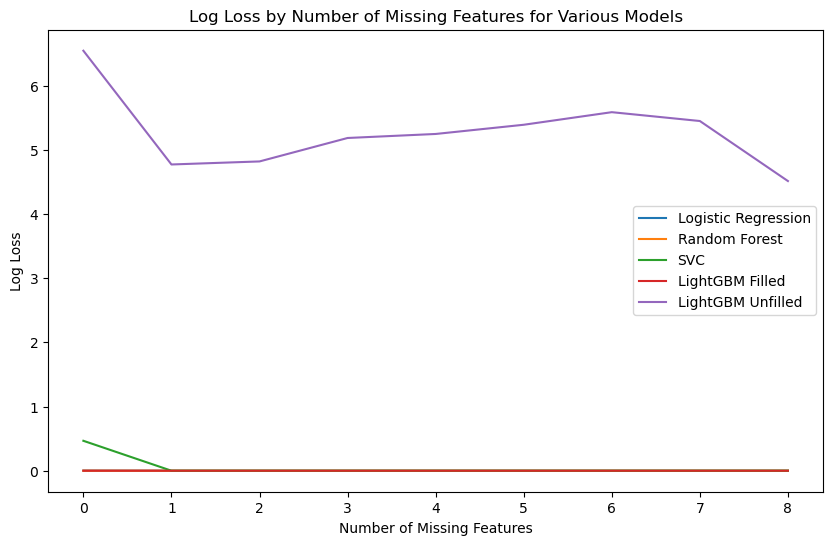

In [13]:
from sklearn.metrics import log_loss
import torch
import numpy as np
import matplotlib.pyplot as plt

def logloss_by_missing_count(X, y, metric, model):
    scores = np.zeros(9)
    X_reset = X.reset_index(drop=True)
    y_reset = y.reset_index(drop=True)
    for i in range(9):
        sample_filter = X_reset.isna().sum(axis=1) == i
        if sample_filter.sum() == 0:
            continue

        X_filtered = X_reset[sample_filter].fillna(X_reset.mean())
        y_filtered = y_reset[sample_filter]

        try:
            prediction = model.predict_proba(X_filtered)[:, 1]
        except:
            
            prediction = model(torch.tensor(X_filtered.values).float()).detach().numpy()
        
        
        score = metric(y_filtered, prediction)
        scores[i] = score
    return scores

print("Log-loss by Missing Feature Count")
plt.figure(figsize=(10, 6))


models = [logistic_regression, random_forest, svc, lgbm_filled, lgbm_unfilled]
model_names = ['Logistic Regression', 'Random Forest', 'SVC', 'LightGBM Filled', 'LightGBM Unfilled']


for model, name in zip(models, model_names):
    X_test_current = X_test_unfilled if name == 'LightGBM Unfilled' else X_test_filled
    y_test_current = y_test_filled  
    y_pred = logloss_by_missing_count(X_test_current, y_test_current, log_loss, model)
    plt.plot(range(9), y_pred, label=name)

plt.xlabel("Number of Missing Features")
plt.ylabel("Log Loss")
plt.title("Log Loss by Number of Missing Features for Various Models")
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

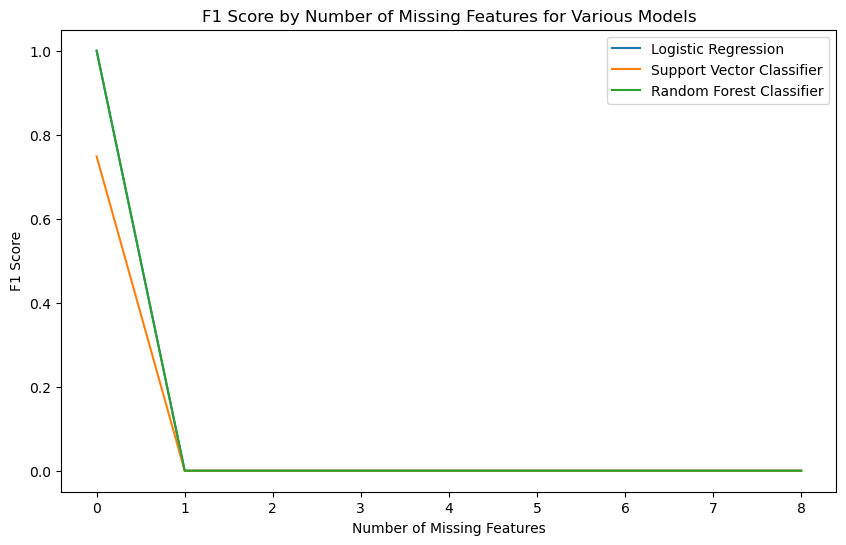

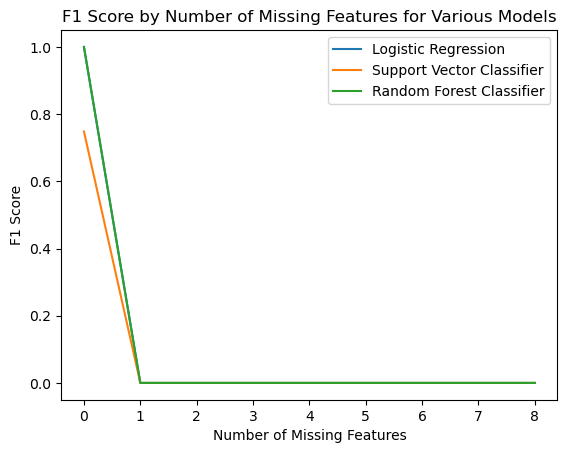

In [14]:
from sklearn.metrics import f1_score
import torch
import numpy as np
import matplotlib.pyplot as plt

def f1_by_missing_count(X, y, metric, model, is_nn=False):
    scores = np.zeros(9)
    for i in range(9):
        sample_filter = X.isna().sum(axis=1) == i
        if sample_filter.sum() == 0:  
            continue
        
        if is_nn:  
            X_filtered = torch.tensor(X[sample_filter].values).float()
            prediction = model(X_filtered).squeeze(1).detach().numpy()
        else: 
            X_filtered = X[sample_filter].fillna(X.mean())  
            prediction = model.predict_proba(X_filtered)[:, 1]
        
        score = metric(y[sample_filter], prediction > 0.5)
        scores[i] = score
    return scores

plt.figure(figsize=(10, 6))
from sklearn.metrics import f1_score
import torch
import numpy as np
import matplotlib.pyplot as plt

def f1_by_missing_count(X, y, metric, model, is_nn=False):
    scores = np.zeros(9)
    for i in range(9):
        sample_filter = X.isna().sum(axis=1) == i
        if sample_filter.sum() == 0:  
            continue
        
        if is_nn:  
            X_filtered = torch.tensor(X[sample_filter].values).float()
            prediction = model(X_filtered).squeeze(1).detach().numpy()
        else: 
            X_filtered = X[sample_filter].fillna(X.mean())  
            prediction = model.predict_proba(X_filtered)[:, 1]
        
        score = metric(y[sample_filter], prediction > 0.5)
        scores[i] = score
    return scores

plt.figure(figsize=(10, 6))
model_names = ['Logistic Regression', 'Support Vector Classifier', 'Random Forest Classifier']
models = [logistic_regression, svc, random_forest]
for model, name in zip(models, model_names):
    y_pred = f1_by_missing_count(X_test_filled, y_test_filled, f1_score, model)
    plt.plot(range(9), y_pred, label=name)

plt.xlabel("Number of Missing Features")
plt.ylabel("F1 Score")
plt.title("F1 Score by Number of Missing Features for Various Models")
plt.legend()
plt.show()
